In [1]:
asdf=1

1

# El método de Newton

#[1]

####Esboza la geometría, tanto a mano como en la computadora, y así encuentra la expresión de $x_{n+1}$ en términos de $x_n$.

In [2]:
using PyPlot, AutoDif

INFO: Loading help data...


Lo que hice fue ir graficando lo que iba escribiendo para tener una idea de qué estaba pasando

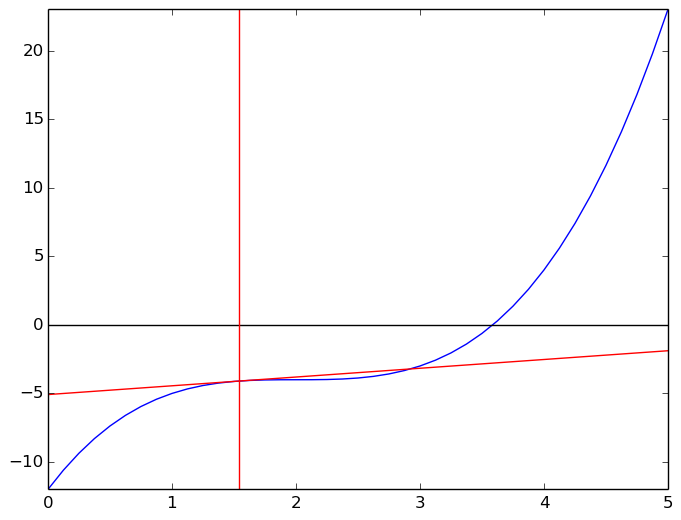

In [3]:
a=0
b=5
f(x)=(x-2)^3-4

x0=b*rand()
recta(x)= (f(ValorDeriv(x0)).deriv)*x  +  f(x0)-x0*f(ValorDeriv(x0)).deriv
x1=x0 - f(x0)/(f(ValorDeriv(x0)).deriv)


x=a:2.0^-3:b
y=similar(x)
y0=similar(x)

for i=1:length(x)
    y[i]=f(x[i])
    y0[i]=recta(x[i])
end

PyPlot.plot(x,y)
PyPlot.plot([a,b],zeros(2),"black")
PyPlot.plot(x0*[1,1],[f(a),f(b)],"red")
PyPlot.plot(x,y0,"red");
PyPlot.plot(x1*[1,1],[f(a),f(b)],"green")
PyPlot.xlim(a,b)
PyPlot.ylim(f(a),f(b));

Por lo tanto, dada una $x_n$ la expresión para $x_{n+1}$ es:

\begin{equation}
    x_{n+1}=x_n - \frac{f(x_n)}{f´(x_n)}
\end{equation}

#[2]
#### Implementa la iteración para calcular la raíz cuadrada y la raíz cúbica de 2. ¿Cuál es una condición razonable de terminación del algoritmo?

Estoy pidiendole al algoritmo que se detenga después de $100$ iteraciones o cuando la función tome un valor cuyo valor absoluto sea menor que $2.0^{-4}$

In [23]:
function cerosNewtonAux(f::Function,x,n::Int64)
    if n>100 
        return "Más de 100 iteraciones"
    elseif norm(f(x))<2.0^-30 
        return x
    else
        println(x)
        n+=1
        cerosNewtonAux(f,  x - f(x)/(f(ValorDeriv(x)).deriv)  ,n)
    end
end

cerosNewton(f::Function,x)=cerosNewtonAux(f::Function,x,1)

cerosNewton (generic function with 1 method)

In [5]:
println(2^(1//3))
f(x)=x^3 - 2
cerosNewton(f,2)

1.2599210498948732


1.2599210498953948

In [6]:
println(2^(1//2))
f(x)=x^2 - 2
cerosNewton(f,2)

1.4142135623730951


1.4142135623746899

#[3]
#### Haz un módulo para llevar a cabo diferenciación automática (usando el código del notebook correspondiente) y utilízalo para implementar el método.

...lo había hecho así desde el principio. El módulo se llama `AutoDif` y permite usar el tipo `ValorDeriv` definido en el notebook 6. Este módulo al igual que todos los que he creado están en la carpeta `MisModulos`

#[4]
####Utiliza el mismo método para la función compleja $f(z)=z^3−1$. Empezando desde distintos números complejos $a+bi$, itera el algoritmo para ver a cuál raíz converge, y colorea el punto inicial de manera correspondiente. [Para esto, se recomienda construir una matriz y utilizar la función pcolor de PyPlot.

Primero pruebo qué hacen mis programas a números complejos:

In [7]:
f(x)=x^3 - 1
println(cerosNewton(f,Complex(1,0)/sqrt(2))) #elegí como puntos iniciales complejos unitarios
println(cerosNewton(f,Complex( -1,1 )/sqrt(2)))
println(cerosNewton(f,Complex( -1,-1 )/sqrt(2)))

1.0000000000000042 + 0.0im
-0.5 + 0.8660254037844387im
-0.5 - 0.8660254037844387im


Parece que funcionan bastante bien O.O

Lo que haré ahora es crear una matriz de unos y cada que una raíz no converga convertiré esa entrada en cero

0.0 + 0.0im


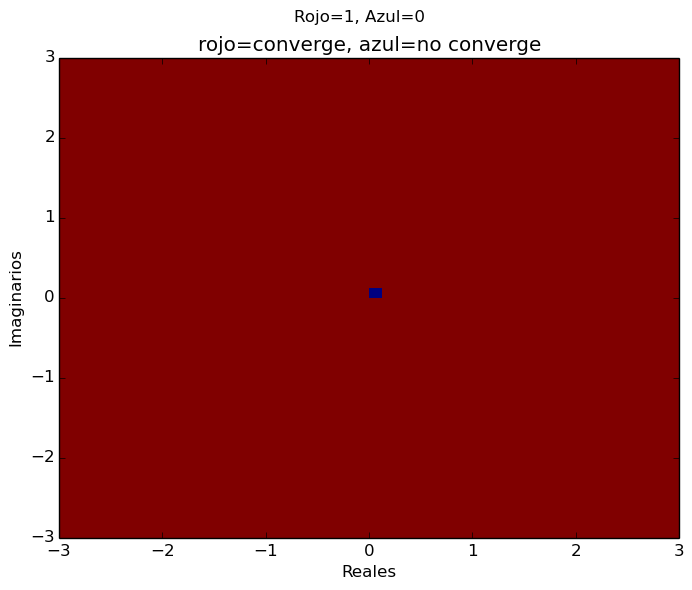

In [8]:
paso=2.0^-3
a=-3
b=3-paso # le quito un elemento ya que pcolor grafica cuadrantes, lo que quiere
        # decir que la matriz z debe tener un elemento menos que los arreglos x,y
        # Nótese que esto quiere decir que nos falta una columna de info
x=Float64[a:paso:b]
y=Float64[a:paso:b]
n=length(x)
z=ones(n,n);
for i=1:n
    for j=1:n
        if typeof(  cerosNewton(f,Complex(x[i],y[j]))  ) == UTF8String
            println(Complex(x[i],y[j])) # imprimo valores en los que no converge
            z[j,i]=0 #es j,i porque en matrices se usa que (renglón, columna) y yo lo quiero al revés
        end
    end
end

push!(x,b+paso)
push!(y,b+paso)

PyPlot.pcolor(x,y,z)
PyPlot.xlabel("Reales")
PyPlot.ylabel("Imaginarios")
PyPlot.suptitle("Rojo=1, Azul=0")
PyPlot.title("rojo=converge, azul=no converge");

Es decir que el único valor que no converge es el cero, lo cual tiene sentido ya que la derivada de la función $f(x)=x^3 - 1$ evaluada en cero es igual a cero, por lo que el término $x_{n+1}$ diverge (ver ejercicio [1])

# Dimensión superior

#[5]
#### Desarrolla e implementa el método de Newton para funciones $\mathbf{f}: \mathbb{R}^n \to \mathbb{R}^n$. Para hacerlo, toma una adivinaza $\mathbf{x}_n$ y resuelve la ecuación $\mathbf{f}(\mathbf{x}_{n+1})=\mathbf{0}$, con $\mathbf{x}_{n+1}=\mathbf{x}_n+δ\mathbf{x}_n$.

Antes de implementarlo para $\mathbf{f}: \mathbb{R}^n \to \mathbb{R}^n$ voy a hacerlo para  $\mathbf{f}: \mathbb{R}^n \to \mathbb{R}$. 

Para lo cual empiezo por definir cómo es `ValorDeriv` con `arreglos`:

In [27]:
import AutoDif.ValorDeriv

function ValorDeriv(valor::Array{Float64,1})
    a=ValorDeriv[]
    for i=1:length(valor)
        push!(a,ValorDeriv(valor[i]))
    end
    return a
end

ValorDeriv (constructor with 3 methods)

In [28]:
x=Float64[4,2,1]
ValorDeriv(x)

3-element Array{ValorDeriv,1}:
 ValorDeriv(4.0,1.0)
 ValorDeriv(2.0,1.0)
 ValorDeriv(1.0,1.0)

Hay un problema, al hacer $\mathbf{x}_{n+1}=\mathbf{x}_n - \frac{f(\mathbf{x}_n)}{f´(\mathbf{x}_n)}$ estoy sumando un escalar al vector $\mathbf{x}_n$. Lo que quiero intentar ahora es incluir no la derivada sino el gradiente, para sumar vectores. Pero aún no se bien como hacerlo. En primer lugar para calcularlo creo que tendría que hacer que la función `f` fuera evaluada en ([x1,1],[x2,0],[x3,0],...) para obtener la componente en X, luego en ([x1,0],[x2,1],[x3,0],...)  para obtener la componente en Y y así sucesivamente. Pero aún cuando pudiera calcular bien el gradiente, como lo incluyo en la teoría de buscar ceros? Creo que la clave es pensar bien esto (fuente wiki):
    
    "Similarly to the usual derivative, the gradient represents the slope of the tangent of the graph of the function. More precisely, the gradient points in the direction of the greatest rate of increase of the function and its magnitude is the slope of the graph in that direction."
    
Busca la ecuación de una recta que vaya en la dirección de este gradiente.

Ahora pruebo para algunas funciones:

In [30]:
f(x)= (x⋅x)^(1/2)
#cerosNewton(f,Float64[4,2,1])

[4.0,2.0,1.0]
[1.0000000000000004,-0.9999999999999996,-1.9999999999999996]
[4.000000000000002,2.0000000000000018,1.0000000000000018]
[1.0000000000000009,-0.9999999999999991,-1.9999999999999991]
[4.0000000000000036,2.0000000000000036,1.0000000000000036]
[1.0000000000000013,-0.9999999999999987,-1.9999999999999987]
[4.000000000000005,2.000000000000005,1.0000000000000049]
[1.0000000000000018,-0.9999999999999987,-1.9999999999999987]
[4.000000000000005,2.0000000000000053,1.0000000000000053]
[1.0000000000000018,-0.9999999999999982,-1.9999999999999982]
[4.000000000000006,2.000000000000006,1.0000000000000062]
[1.0000000000000018,-0.9999999999999982,-1.9999999999999982]
[4.000000000000006,2.000000000000006,1.0000000000000062]
[1.0000000000000018,-0.9999999999999982,-1.9999999999999982]
[4.000000000000006,2.000000000000006,1.0000000000000062]
[1.0000000000000018,-0.9999999999999982,-1.9999999999999982]
[4.000000000000006,2.000000000000006,1.0000000000000062]
[1.0000000000000018,-0.999999999999998

"Más de 100 iteraciones"

4.242640687119285

In [179]:
function cerosNewtonVectorialAux(f::Function,x,n::Int64)
    δ=2.0^-1
    if n>200 
        return "Más de 200 iteraciones" #Aumenté el máximo de iteraciones
    elseif norm(f(x))<2.0^-30 
        return x
    else
        n+=1
        if norm(f(x - δ*x))<norm(f(x + δ*x))
            δ=-δ
        end
        cerosNewtonVectorialAux(f,  x + δ*x  ,n)
    end
end

cerosNewtonVectorial(f::Function,x)=cerosNewtonVectorialAux(f::Function,x,1)

cerosNewtonVectorial (generic function with 1 method)

Voy a hacer una función que cheque la convergencia en un área para funciones de $\mathbf{f}: \mathbb{R}^2 \to \mathbb{R}^2$ (análogamente a como lo hice en [4]).

In [180]:
function checaConverg(f::Function)
    paso=2.0^-3
    a=-3
    b=3-paso # le quito un elemento ya que pcolor grafica cuadrantes, lo que quiere
    # decir que la matriz z debe tener un elemento menos que los arreglos x,y
    # Nótese que esto quiere decir que nos falta una columna de info
    x=Float64[a:paso:b]
    y=Float64[a:paso:b]
    n=length(x)
    z=ones(n,n);
    for i=1:n
        for j=1:n
            if typeof(  cerosNewtonVectorial(f,[x[i],y[j]])  ) == UTF8String
                println([x[i],y[j]]) # imprimo valores en los que no converge
                z[j,i]=0 #es j,i porque en matrices se usa que (renglón, columna) y yo lo quiero al revés
            end
        end
    end
    
    push!(x,b+paso)
    push!(y,b+paso)
    
    if(z==ones(n,n))
        println("Todos convergen")
    else
        
        PyPlot.pcolor(x,y,z)
        PyPlot.xlabel("Reales")
        PyPlot.ylabel("Imaginarios")
        PyPlot.suptitle("Rojo=1, Azul=0")
        PyPlot.title("rojo=converge, azul=no converge");
    end
end

checaConverg (generic function with 1 method)

In [181]:
ff(x)=x #Función identidad
checaConverg(ff)
cerosNewtonVectorial(ff,Float64[4,1])

Todos convergen


2-element Array{Float64,1}:
 4.65661e-10
 1.16415e-10

In [182]:
ff(x)=[x[1],-x[2]] #Reflexión
checaConverg(ff)
cerosNewtonVectorial(ff,Float64[3,2])

Todos convergen


2-element Array{Float64,1}:
 6.98492e-10
 4.65661e-10

In [183]:
θ=π/4
ff(x)=[cos(θ)x[1]-sin(θ)x[2],sin(θ)x[1]+cos(θ)x[2]] #Rotación
checaConverg(ff)
cerosNewtonVectorial(ff,Float64[1,4])

Todos convergen


2-element Array{Float64,1}:
 1.16415e-10
 4.65661e-10

In [194]:
function cerosNewtonVectorialAux(f::Function,x,n::Int64)
    δ=2.0^-1
    if n>10 
        return "Más de 200 iteraciones" #Aumenté el máximo de iteraciones
    elseif norm(f(x))<2.0^-30 
        return x
    else
        n+=1
        while norm(f(x - δ*x))>norm(f(x)) && norm(f(x + δ*x))>norm(f(x))
            δ=δ/2 #si moverme hace que me aleje del cero, me muevo menos
        end
        if norm(f(x - δ*x))<norm(f(x + δ*x))
            δ=-δ
        end
        println(norm(f(x - δ*x)))
        println(norm(f(x + δ*x)))
        println(x)
        println()
        cerosNewtonVectorialAux(f,  x + δ*x  ,n)
    end
end

cerosNewtonVectorial(f::Function,x)=cerosNewtonVectorialAux(f::Function,x,1)

cerosNewtonVectorial (generic function with 1 method)

In [196]:
ff(x)=x-[0.5,1.2] #Traslación
#checaConverg(ff)
cerosNewtonVectorial(ff,Float64[5.5,-2.4])

9.116057261777154
3.289756829919196
[5.5,-2.4]

4.705382556179678
2.0014057559625433
[2.75,-1.2]

2.61751910212705
1.511673327805978
[1.375,-0.6]

1.733414711631351
1.359012164220762
[0.6875,-0.3]

1.4250856608025355
1.3165451058072413
[0.34375,-0.15]

1.3346576471725813
1.3049344826106215
[0.171875,-0.075]

1.309913979537993
1.3016255705757176
[0.0859375,-0.0375]

1.3030702574870112
1.3006018199257374
[0.04296875,-0.01875]

1.3010610065392076
1.3002481223783924
[0.021484375,-0.009375]

1.3004117790373955
1.30011085991239
[0.0107421875,-0.0046875]



"Más de 200 iteraciones"

In [164]:
norm(ff(ans))

4.799926683327254e-10

In [17]:
methods(ValorDeriv)

# 2 methods for generic function "ValorDeriv":
ValorDeriv(valor,deriv)
ValorDeriv(valor) at /home/santiago/Documentos/Escuela-maestría/1er-semestre/Física-computacional/Clase/MisModulos/AutoDif/src/AutoDif.jl:16

In [199]:
import AutoDif.ValorDeriv

function ValorDeriv(valor::Array{Float64,1})
    a=ValorDeriv[]
    for i=1:length(valor)
        push!(a,ValorDeriv(valor[i]))
    end
    return a
end

#ValorDeriv(valor::Array{Float64,1})=ValorDeriv(valor,ones(Float64,length(valor)))

ValorDeriv (constructor with 4 methods)

In [200]:
x=Float64[4,1,1]
y=Float64[1,-4,0]

#f1(x)

println(ValorDeriv(x))
#println(f1(ValorDeriv(x)))


[ValorDeriv(4.0,1.0),ValorDeriv(1.0,1.0),ValorDeriv(1.0,1.0)]


In [67]:
getindex(x::ValorDeriv,n::Int64)=ValorDeriv(x.valor[n],x.deriv[n])

getindex (generic function with 202 methods)

In [68]:
methods(ValorDeriv)

# 4 methods for generic function "ValorDeriv":
ValorDeriv(valor::Array{Any,1}) at In[31]:4
ValorDeriv(valor::Array{Float64,1}) at In[65]:11
ValorDeriv(valor,deriv)
ValorDeriv(valor) at /home/santiago/Documentos/Escuela-maestría/1er-semestre/Física-computacional/Clase/MisModulos/AutoDif/src/AutoDif.jl:16

In [63]:
Float64[4,1,1]-(Float64[4,1,1]/(ValorDeriv(Float64[4,1,1]).deriv))

LoadError: dimensions must match
while loading In[63], in expression starting on line 1

#[6]
####Utiliza tu algoritmo para calcular raíces de funciones conocidas multidimensionales.